In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the paths
vimeo_images_folder = 'data/vimeo_data/vimeo_images'
vimeo_conditions_folder = 'data/vimeo_data/vimeo_conditions'

# Get the list of images
image_files = sorted([f for f in os.listdir(vimeo_images_folder) if f.endswith(('png', 'jpg', 'jpeg'))])[:4]

# Get the list of condition types
condition_types = sorted(os.listdir(vimeo_conditions_folder))

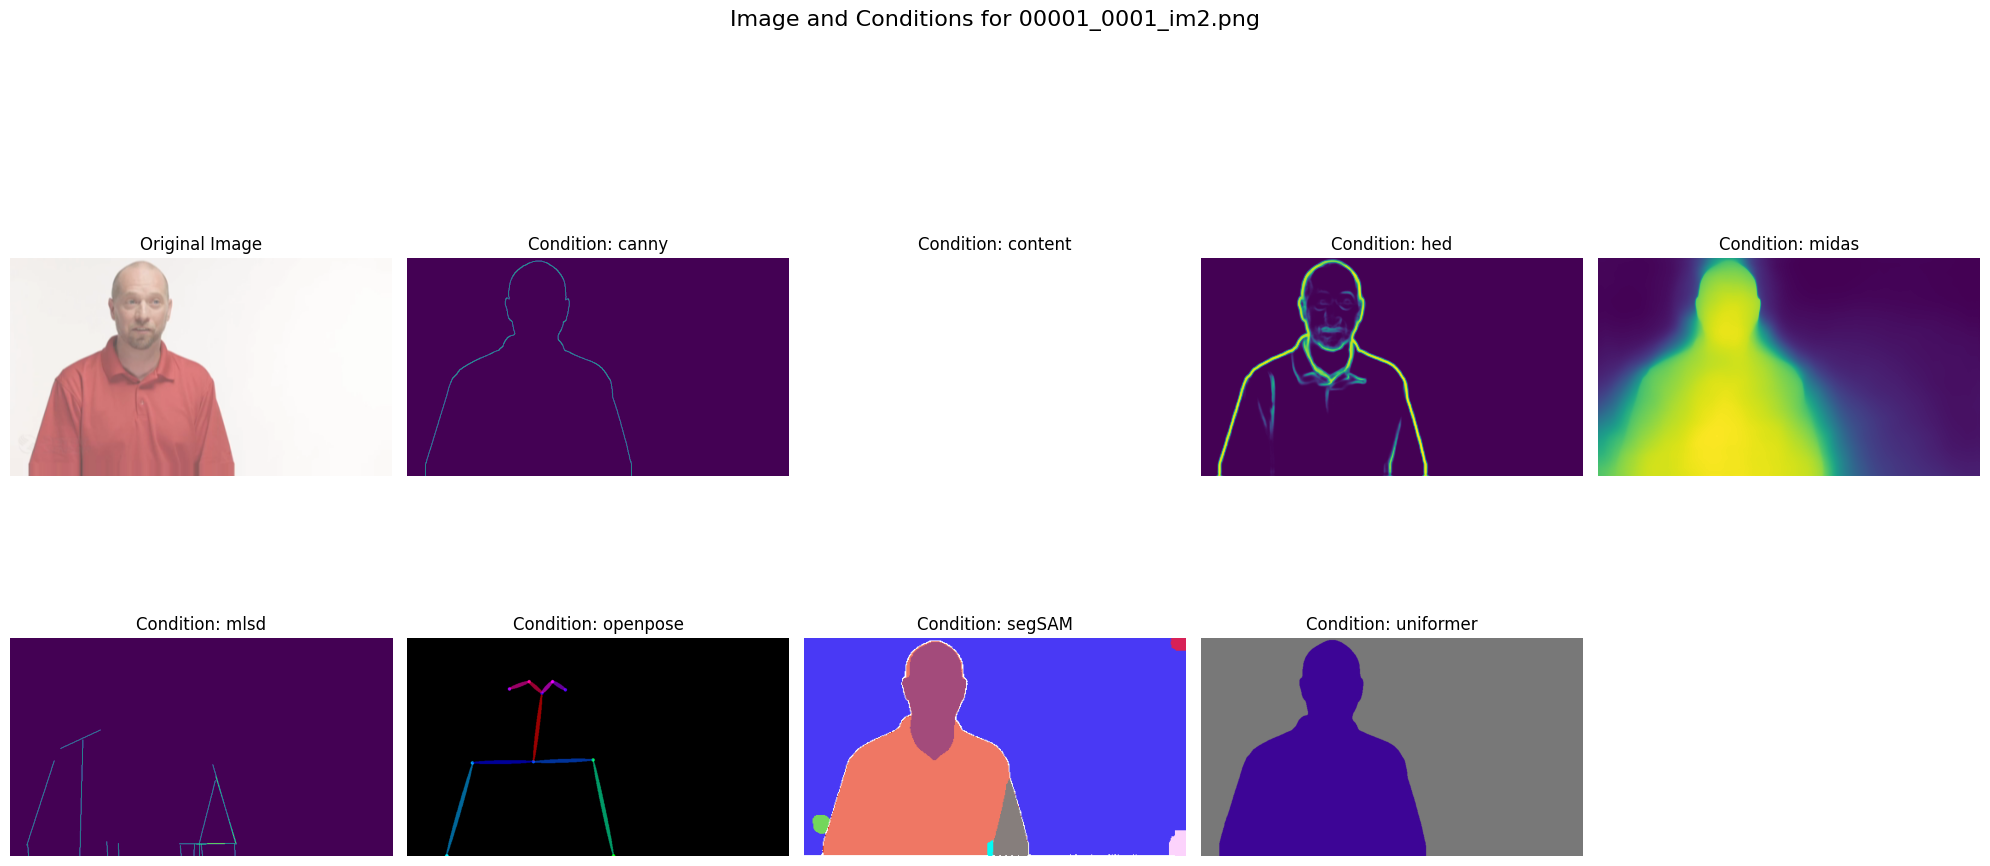

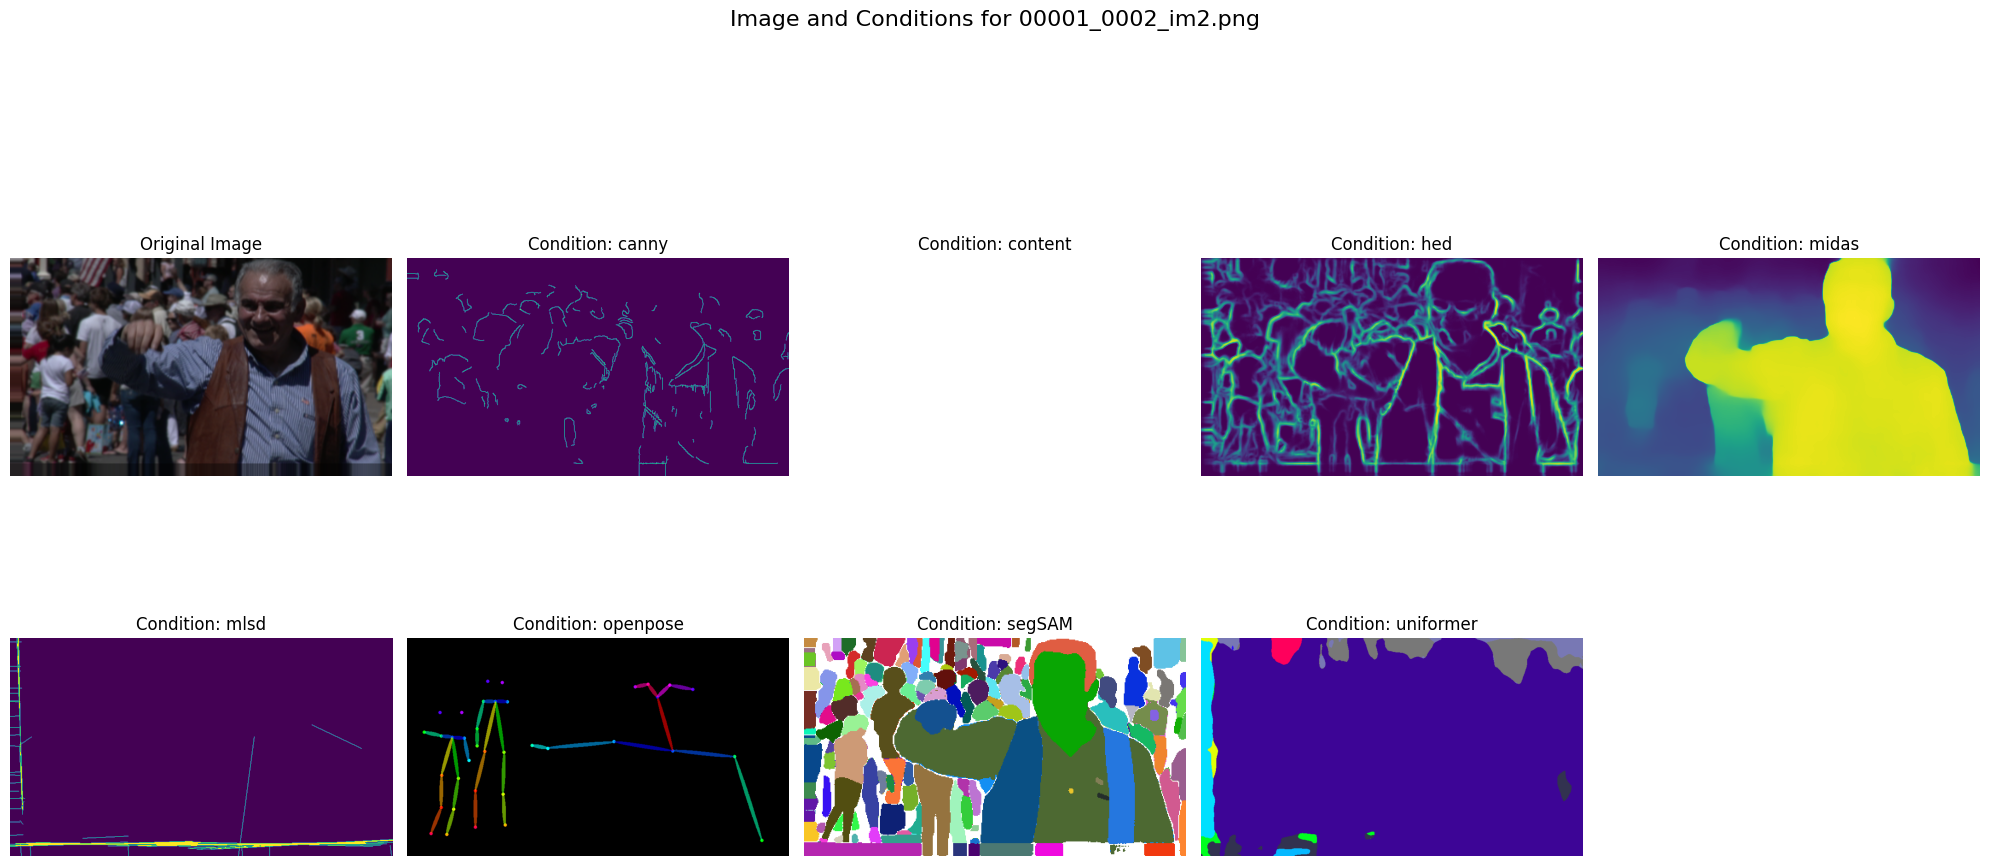

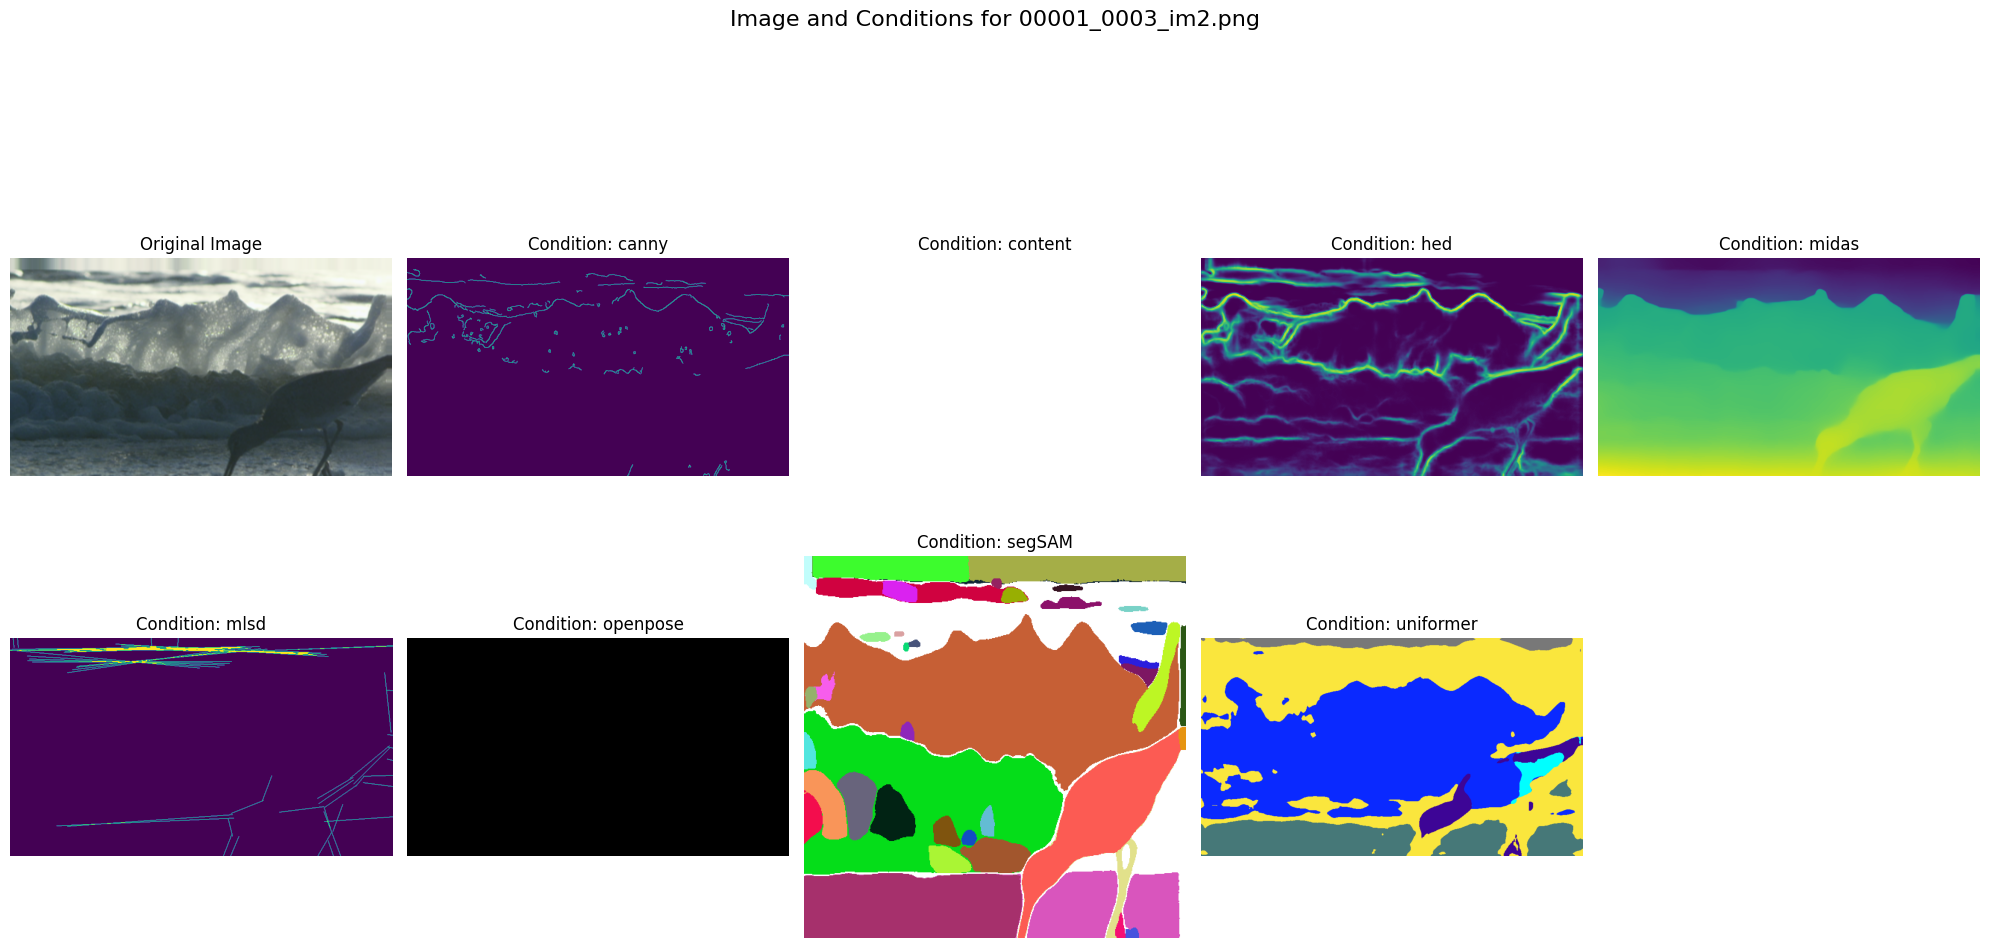

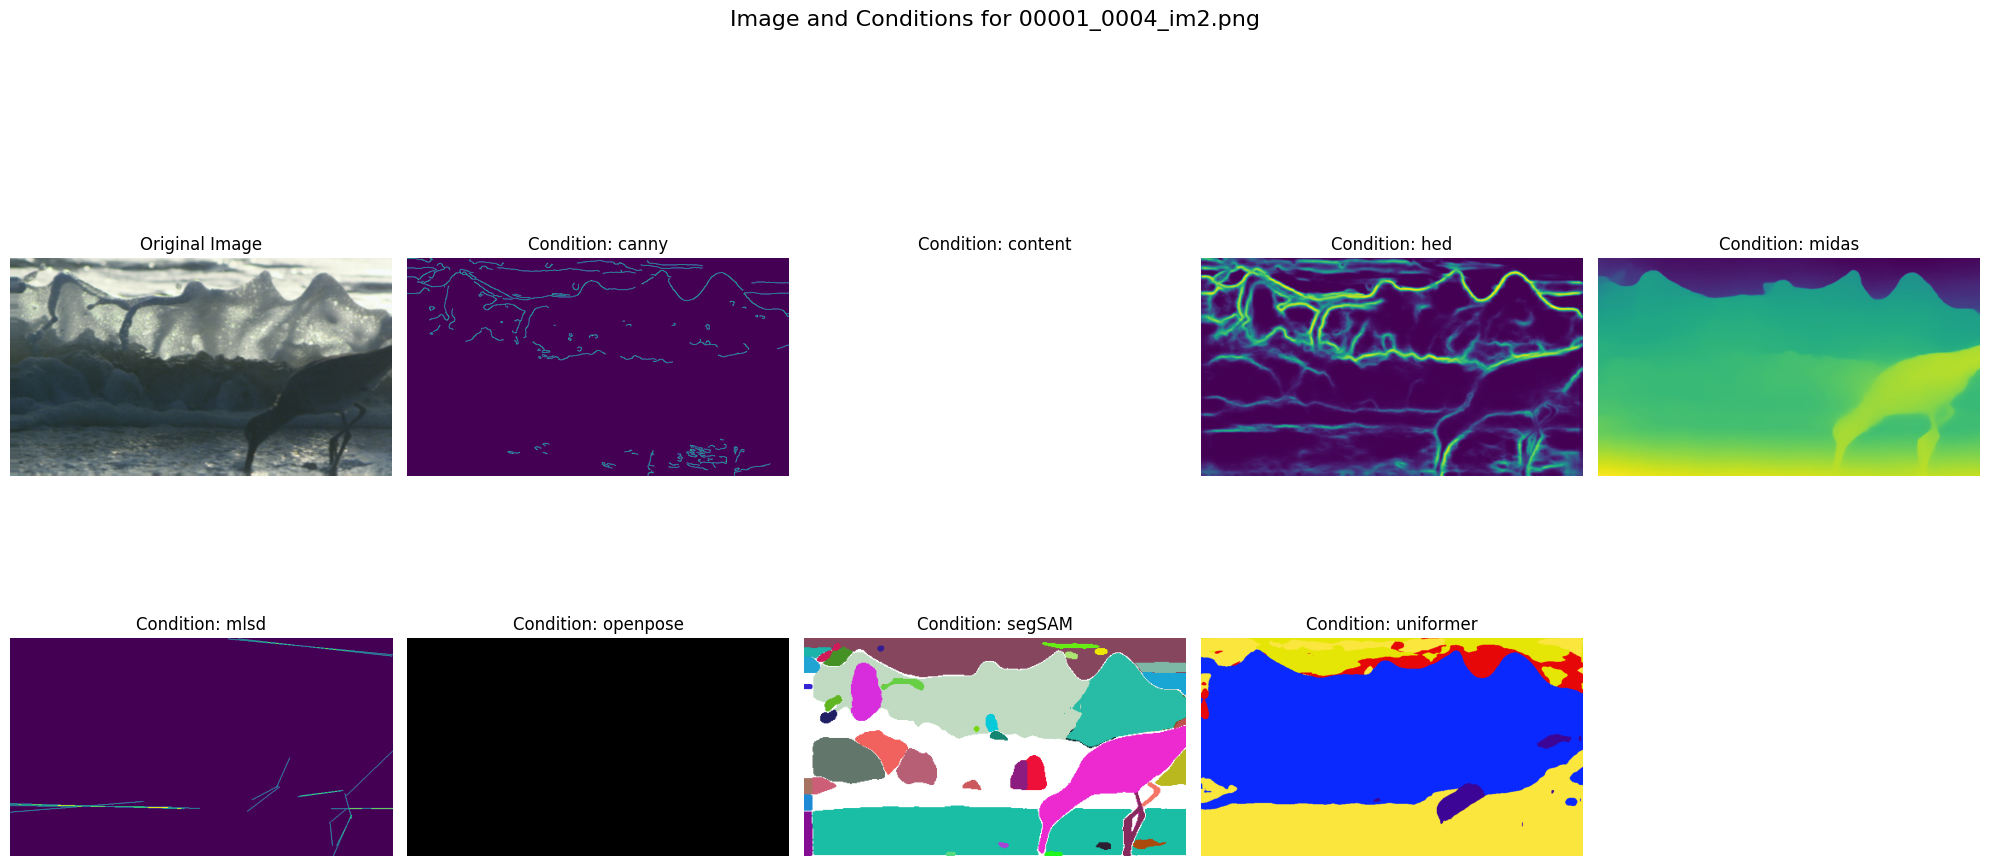

In [11]:
num_columns = len(condition_types) // 2 + 1
for img_file in image_files:
    fig, axes = plt.subplots(2, num_columns, figsize=(20, 10))
    fig.suptitle(f'Image and Conditions for {img_file}', fontsize=16)

    # Load the image
    img_path = os.path.join(vimeo_images_folder, img_file)
    img = Image.open(img_path)
    
    # Plot the original image
    axes[0, 0].imshow(img)
    axes[0, 0].axis('off')
    axes[0, 0].set_title('Original Image')
    
    # Loop through the condition types
    for j, condition_type in enumerate(condition_types):
        # Calculate row and column indices
        row = (j + 1) // num_columns
        col = (j + 1) % num_columns
        
        # Construct the condition image paths
        condition_path1 = os.path.join(vimeo_conditions_folder, condition_type, img_file)
        condition_path2 = os.path.join(vimeo_conditions_folder, condition_type, f"{os.path.splitext(img_file)[0]}_0.png")
        
        # Load the condition image if it exists, otherwise create a blank image
        if os.path.exists(condition_path1):
            condition_img = Image.open(condition_path1)
        elif os.path.exists(condition_path2):
            condition_img = Image.open(condition_path2)
        else:
            condition_img = Image.new('RGB', img.size, (255, 255, 255))  # Create a white image if condition is missing
        
        # Plot the condition image
        axes[row, col].imshow(condition_img)
        axes[row, col].axis('off')
        axes[row, col].set_title(f'Condition: {condition_type}')
        
    # Remove unused subplots
    for j in range(len(condition_types) + 1, 2 * num_columns):
        row = j // num_columns
        col = j % num_columns
        fig.delaxes(axes[row, col])
        
    # Adjust layout and save plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'comparison_{img_file}.png')
    plt.show()

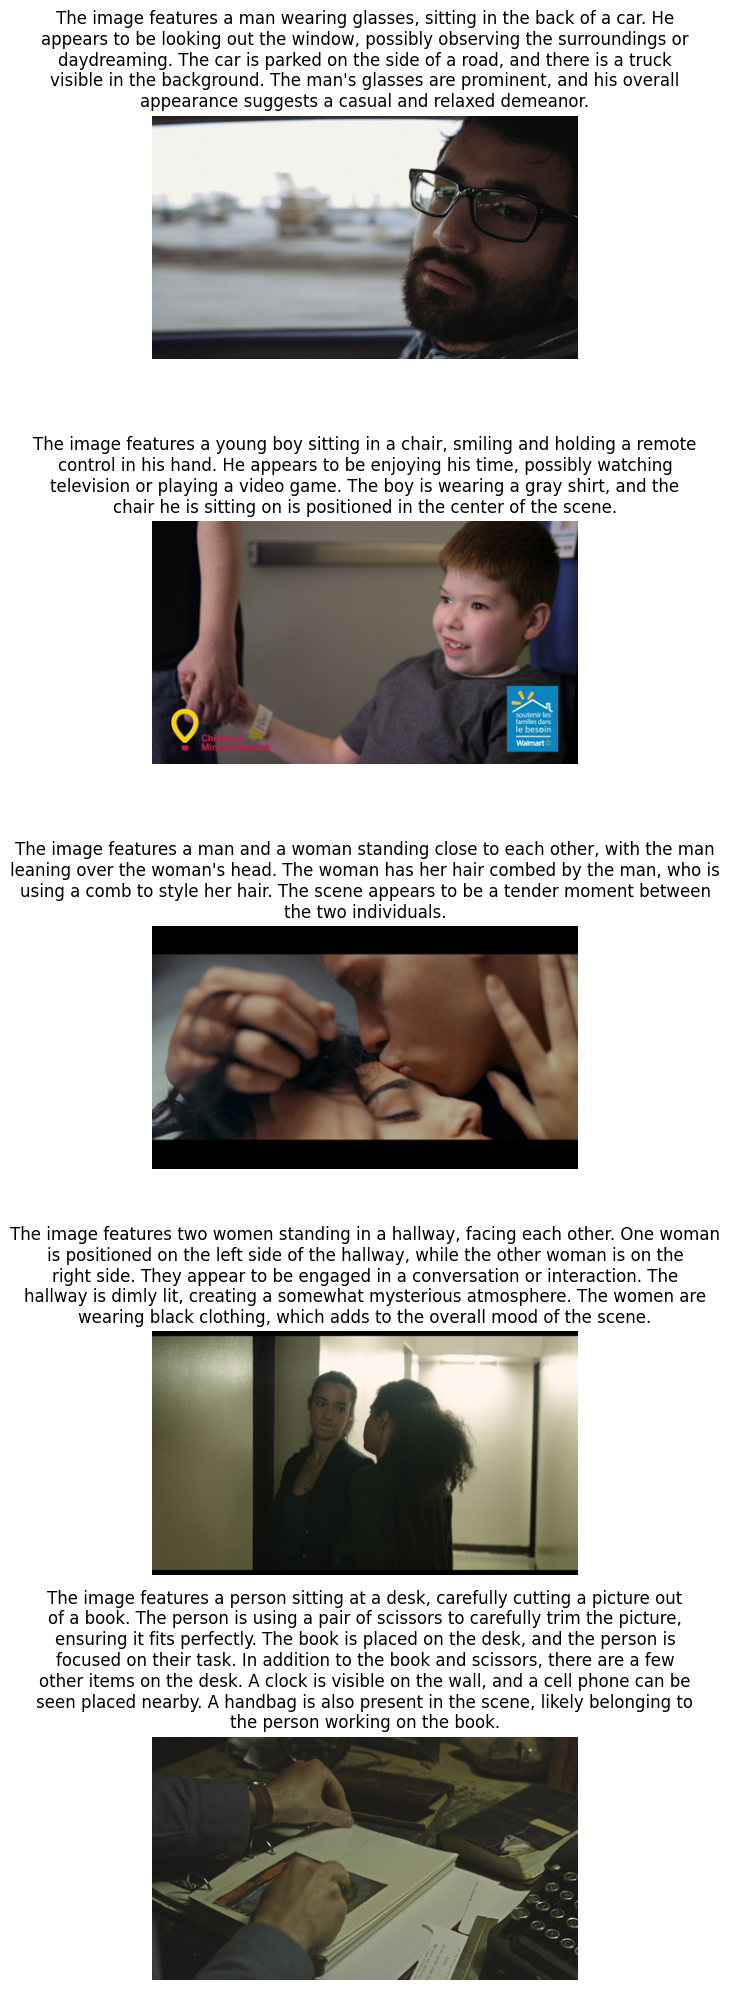

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import textwrap

# Path to the images folder and annotation file
images_folder = '/data/maryam.sana/Uni-ControlNet/data/vimeo_data/images/'
ann_file = '/data/datasets/vimeo/annotations.txt'

# Function to read annotations and return a dictionary
def read_annotations(ann_file):
    annotations = {}
    with open(ann_file, 'r') as file:
        for line in file:
            file_id, caption = line.strip().split('\t', 1)
            annotations[file_id] = caption
    return annotations

# Function to display images with captions
def display_images_with_captions(images_folder, annotations, num_images=5):
    file_ids = list(annotations.keys())
    selected_file_ids = random.sample(file_ids, num_images)
    
    fig, axs = plt.subplots(num_images, 1, figsize=(10, 20))
    for i, file_id in enumerate(selected_file_ids):
        image_path = os.path.join(images_folder, f'{file_id}.png')
        image = Image.open(image_path)
        caption = annotations[file_id]
        
        axs[i].imshow(image)
        axs[i].set_title("\n".join(textwrap.wrap(caption, 80)), fontsize=12)
        axs[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Read annotations
annotations = read_annotations(ann_file)

# Display 5 images with captions
display_images_with_captions(images_folder, annotations, num_images=5)
